[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DoranLyong/Awesome-Tensor-Architecture/blob/main/pytorch_reference/simple_reference/03_Development_with_PyTorch/03_dev_pipeline.ipynb)

## What do I need? - the basic deep learning development process (p.53)

In [1]:
"""
- data preparation
- build a model 
- train the model 
- test the trained model to check performance 
- For improving, tweak hyperparameters and retrain 
- finally, deploy your model for any service 
"""

'\n- data preparation\n- build a model \n- train the model \n- test the trained model to check performance \n- For improving, tweak hyperparameters and retrain \n- finally, deploy your model for any service \n'

In [2]:
import torch 
import torchvision 

print(torch.__version__)
print(torchvision.__version__)

1.9.0+cu111
0.10.0+cu111


## Data Loading (p.55)
* CIFAR-10 from ```torchvision.datasets```

In [3]:
from torchvision.datasets import CIFAR10

"""
    Dataset class returns a dataset object that includes : 
        - data and 
        - information about the data 
"""
train_data = CIFAR10(   root= "./train", 
                        train=True, 
                        download=True
                    )

Files already downloaded and verified


In [4]:
dir(train_data) # show class attributes 

['__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_integrity',
 '_format_transform_repr',
 '_is_protocol',
 '_load_meta',
 '_repr_indent',
 'base_folder',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'filename',
 'meta',
 'root',
 'target_transform',
 'targets',
 'test_list',
 'tgz_md5',
 'train',
 'train_list',
 'transform',
 'transforms',
 'url']

In [5]:
# general information of the dataset object 
print(train_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train
    Split: Train


In [6]:
# length of the data 
print(len(train_data))

50000


In [7]:
# shape of data 
print(type(train_data.data))
print(train_data.data.shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)


In [8]:
# targets in index(= labels)
print(type(train_data.targets))
print(len(train_data.targets))

<class 'list'>
50000


In [9]:
# class names 
print(train_data.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [10]:
# class names to index values 
print(train_data.class_to_idx)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


## Access a data sample (p.57)
* using an index 

In [11]:
one_instance = train_data[0]

print(type(one_instance)) 
print(len(one_instance))

data, label = one_instance

<class 'tuple'>
2


In [12]:
print(type(data))
print(type(label))
print(data) # 32x32 size, RGB image 

<class 'PIL.Image.Image'>
<class 'int'>
<PIL.Image.Image image mode=RGB size=32x32 at 0x7F1DD9194A60>


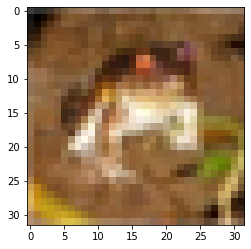

In [13]:
# Visualize the data 
import matplotlib.pyplot as plt 

plt.imshow(data)

In [14]:
# examine the label 
print(type(label))
print(label)  
print(train_data.classes[label])

<class 'int'>
6
frog


### Likewise, call test data 

In [15]:
test_data = CIFAR10(root='./test', 
                    train=False, 
                    download=True
                    )

Files already downloaded and verified


In [16]:
print(test_data)

print(len(test_data))
print(test_data.data.shape)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test
    Split: Test
10000
(10000, 32, 32, 3)


## Data Transforms (p.59)
* load the dataset object applying transforms to 

In [17]:
from torchvision import transforms as T 

train_T = T.Compose([ T.RandomCrop(32, padding=4),
                      T.RandomHorizontalFlip(), 
                      T.ToTensor(), 
                      T.Normalize( mean= (0.4914, 0.4822, 0.4465),
                                   std=(0.2023, 0.1994, 0.2010)),
                    ])

train_data = CIFAR10(   root="./train",
                        train=True, 
                        download=True, 
                        transform=train_T, # set the transform parameter when creating the dataset 
                    )

Files already downloaded and verified


In [18]:
print(train_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [19]:
print(train_data.transforms)

StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [20]:
data, label = train_data[0]

print(type(data))
print(data.size())

<class 'torch.Tensor'>
torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


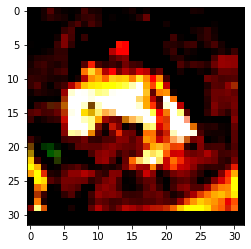

In [21]:
plt.imshow(data.permute(1, 2, 0)) # (C, H, W) -> (H, W, C) for visualization 

### Likewise, call test data but different transforms 

In [22]:
test_T = T.Compose([  T.ToTensor(),
                      T.Normalize( mean=(0.4914, 0.4822, 0.4465),
                                   std=(0.2023, 0.1994, 0.2010))
                   ])

test_data = CIFAR10(root="./test",
                    train=False, 
                    transform=test_T, 
                    )

In [23]:
print(test_data)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


## Data Batching (p.62)
* sending data in batches for model input in PyTorch 
* use the ```torch.utils.data.DataLoader``` for batch processing 
* refer to p.67 for more advanced usage 

※ built-in ```DataLoader``` generates an iterable for your data

In [24]:
from torch.utils.data import DataLoader 

trainloader = DataLoader( train_data,  # dataset object 
                          batch_size=16, 
                          shuffle=True, 
                          num_workers=3,
                        )

In [25]:
""" 
    Simply check the dataloader object.
    Retrieve a batch of sampels from the trainloader: 

        - iter() to cast the trainloader to an iterator 
        - next() to iterate over the data one more time 
"""

data_batch, labels_batch = next(iter(trainloader)) 

print(data_batch.size())
print(labels_batch.size())

torch.Size([16, 3, 32, 32])
torch.Size([16])


In [26]:
testloader = DataLoader( test_data, 
                         batch_size=16, 
                          shuffle=False,
                          num_workers=3,
                       )

*** 
## Model Design - using existing & pre-trained models (p.69)
* from ```torchvision.models``` 
* from ```torch.hub```  (docker hub 같은 것)

In [27]:
from torchvision import models

model = models.vgg16(pretrained=True)

print(dir(model))
print(model.classifier)

['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward_hooks', '_buffers', '_call_impl', '_forward_hooks', '_forward_pre_hooks', '_get_backward_hooks', '_get_name', '_initialize_weights', '_is_full_backward_hook', '_load_from_state_dict', '_load_state_dict_pre_hooks', '_maybe_warn_non_full_backward_hook', '_modules', '_named_members', '_non_persistent_buffers_set', '_parameters', '_register_load_state_dict_pre_hook', '_register_state_dict_hook', '_replicate_for_data_parallel', '_save_to_state_dict', '_slow_forward', '_state_dict_hooks', '_version', 'add_module', 'apply', 'avgpool', 'bfloat16', 'buffers'

In [28]:
""" 'Pytorch Hub' is another excellent resource for existing and pretrained PyTorch models. 
    Load models from another repository using the torch.hub.load() API. 
"""

# i.e., call a model, WaveGlow, from the NVIDIA DeepLearningExamples repository. 
waveglow = torch.hub.load( 'nvidia/DeepLearningExamples:torchhub', 
                            'nvidia_waveglow'
                        )

Using cache found in /home/doranlyong/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub
/home/doranlyong/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub/PyTorch/SpeechSynthesis/Tacotron2/waveglow/model.py:55: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:1940.)
  W = torch.qr(torch.FloatTensor(c, c).normal_())[0]


In [29]:
# To explore all the available API endpoints of a particular repository 
# This lists all the models available in the 'nvidia/DeepLearningExamples:torchhub' repo. 

torch.hub.list( 'nvidia/DeepLearningExamples:torchhub' )

Using cache found in /home/doranlyong/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub


['nvidia_ssd',
 'nvidia_ssd_processing_utils',
 'nvidia_tacotron2',
 'nvidia_tts_utils',
 'nvidia_waveglow']

## Model Design - custom NN model (p.71)
using PyTorch NN module; ```torch.nn```

Consist of :
* input layer 
* hidden layer 
* output layer 

In [30]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 


class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()   # super() function to execute the parent nn.Module class's __init__() method 
                                            # to initialize the class parameters. 

        self.fc1 = nn.Linear( in_features=2048, out_features=256 ) # (ref) https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
        self.fc2 = nn.Linear( 256, 64 )
        self.fc3 = nn.Linear( 64, 2 )

    def forward(self, x:torch.Tensor) -> torch.Tensor: # Define how the model processes data 
        assert x.dim() == 4, f"Input tensor to temporal convolution must be 4d! but, {x.dim()}d tensor is given"
        
        x = x.view(-1, 2048)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x 

In [31]:
# instantiating the model object 

model = SimpleNet() # Instantiate, or create the model

print(model)

SimpleNet(
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)


In [32]:
input = torch.rand(4, 1, 1, 2048)  # (batch, channel, height, width)
score = model(input)

print(score)

tensor([[-0.1938,  0.1466],
        [-0.1824,  0.1057],
        [-0.1688,  0.1187],
        [-0.1095,  0.1547]], grad_fn=<AddmmBackward>)


## Training (p.85) 
* training CIFAR-10 with ```LeNet5``` by ```Yann LeCun``` in the 1990s

In [33]:
import torch.nn as nn 
import torch.nn.functional as F 

class LeNet5(nn.Module): 
    def __init__(self): 
        super(LeNet5, self).__init__() 

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5) # (ref) https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        assert x.dim() == 4, f"Input tensor to temporal convolution must be 4d! but, {x.dim()}d tensor is given"

        x = F.max_pool2d( F.relu(self.conv1(x)), 
                          (2,2), # kernel size 
                        )
        x = F.max_pool2d( F.relu(self.conv2(x)), 2 )
#        print(x.shape)  # e.g., (4, 3, 32, 32) -> (4, 16, 5, 5)
        x = x.view(-1, int(x.nelement() / x.shape[0]))  # num_elements / batch_size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x 

In [34]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"


model = LeNet5().to(device) # Instantiate, or create the model

# === TEST === # 
input = torch.rand(4, 3, 32, 32)  # (batch, channel, height, width)
score = model(input.to(device))

print(score.shape)

torch.Size([4, 10])


/home/doranlyong/anaconda3/envs/py39/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


## Fundamental Training Loop 

* define the loss function (called the ```criterion```)
* define optimizer algorithm

In [35]:
import torch.nn as nn 
import torch.optim as optim 

criterion = nn.CrossEntropyLoss() 

optimizer = optim.SGD( model.parameters(), # (!) be sure to pass in the model.parameters() 
                        lr=1e-3, 
                        momentum=0.9,
                     ) 

In [36]:
EPOCHS = 10 

for epoch in range(EPOCHS): 

    model.train() # set train mode 
    batch_loss = 0.0 

    for inputs, labels in trainloader: 

        inputs = inputs.to(device)
        labels = labels.to(device)

        # === forward 
        scores = model(inputs)
        loss = criterion(scores, labels)
        

        # === backward 
        optimizer.zero_grad() # Zero out gradients before each backpropagation pass, or they'll accumulate. 
        loss.backward() 


        # === gradient descent, and step 
        optimizer.step() 

        # === accumulate batch loss 
        batch_loss += loss.item() 

    print(f" Epoch: {epoch}, Avg_loss: {batch_loss / len(trainloader)}")


 Epoch: 0, Avg_loss: 1.9350018263244628
 Epoch: 1, Avg_loss: 1.5838120969200133
 Epoch: 2, Avg_loss: 1.4504999675750732
 Epoch: 3, Avg_loss: 1.361796992111206
 Epoch: 4, Avg_loss: 1.3011036464309693
 Epoch: 5, Avg_loss: 1.254812949333191
 Epoch: 6, Avg_loss: 1.2209006089878083
 Epoch: 7, Avg_loss: 1.1894887944412231
 Epoch: 8, Avg_loss: 1.160944178981781
 Epoch: 9, Avg_loss: 1.1359832714271545


## Validation (p.94)
* Splitting Training Dataset into Training & Validation Datasets

In [37]:
len(train_data)

50000

In [38]:
from torch.utils.data import random_split 

train_set, val_set = random_split(  train_data, 
                                    [40000, 10000], 
                                )

trainloader = DataLoader(   train_set,     # p.62
                            batch_size=16, 
                            shuffle=True, 
                            num_workers=3, 
                        )

valloader = DataLoader( val_set,
                        batch_size=16, 
                        shuffle=True,
                        num_workers=3
                       )  

print(len(trainloader))    # 16 * 2500 = 40000                 
print(len(valloader))      # 16 * 625 = 10000

2500
625


### training loop with validation 

In [39]:
import torch.nn as nn 
import torch.optim as optim


model = LeNet5().to(device)

criterion = nn.CrossEntropyLoss() 
optimizer = optim.SGD(  model.parameters(), 
                        lr=1e-3, 
                        momentum=0.9, 
                    )

In [40]:
EPOCHS = 10 

for epoch in range(EPOCHS): 

    # === Training === # 
    model.train() 
    train_loss = 0.0 

    for inputs, labels in trainloader: 
        
        inputs = inputs.to(device)
        labels = labels.to(device)

        # === forward 
        score = model(inputs)
        loss = criterion(score, labels)

        # === backward 
        optimizer.zero_grad() 
        loss.backward() 

        # === gradient descent, and step 
        optimizer.step() 


        # === accumulate batch loss 
        train_loss += loss.item() 

    
    # === Validation === # 
    model.eval() 
    val_loss = 0.0 

    for inputs, labels in valloader: 
        inputs = inputs.to(device)
        labels = labels.to(device)

        # === forward 
        score = model(inputs)
        loss = criterion(score, labels)

        # === accumulate batch loss 
        val_loss += loss.item() 

    
    print(f"Epoch: {epoch}, avg_TrainLoss: {train_loss/len(trainloader)}, avg_ValLoss: {val_loss/len(valloader)}")



        


    
    

Epoch: 0, avg_TrainLoss: 2.0477127197265625, avg_ValLoss: 1.8506497562408448
Epoch: 1, avg_TrainLoss: 1.6999339406967162, avg_ValLoss: 1.6265272552490235
Epoch: 2, avg_TrainLoss: 1.5589246153116225, avg_ValLoss: 1.5205268508911134
Epoch: 3, avg_TrainLoss: 1.476604621744156, avg_ValLoss: 1.4567375440597534
Epoch: 4, avg_TrainLoss: 1.4093870484113693, avg_ValLoss: 1.3948649516105651
Epoch: 5, avg_TrainLoss: 1.3653048881530763, avg_ValLoss: 1.3376896905899047
Epoch: 6, avg_TrainLoss: 1.321136818766594, avg_ValLoss: 1.3044609288215636
Epoch: 7, avg_TrainLoss: 1.2820677130937577, avg_ValLoss: 1.30562296333313
Epoch: 8, avg_TrainLoss: 1.2574018606305122, avg_ValLoss: 1.2835068096160889
Epoch: 9, avg_TrainLoss: 1.23261748752594, avg_ValLoss: 1.2740140192985534


## Testing (p.97)

In [41]:
model.eval() 
num_correct = 0.0 

for inputs, labels in testloader: 
    inputs = inputs.to(device)
    labels = labels.to(device)

    # inference 
    score = model(inputs)
    score_max, idx = torch.max(score, 1) # select the class index with the highest score 

    # check correct
    num_correct += ( idx == labels).float().sum() # compare the prediction to the true label 
                                                  # and count the number of correct predictions. 


# === Performance metric === # 
Acc = num_correct / (len(testloader) * testloader.batch_size)

print(f"num_batches: {len(testloader)}, batch_size: {testloader.batch_size}")
print(f"Test ACC: {Acc:.3f}")

num_batches: 625, batch_size: 16
Test ACC: 0.582


## Model Deployment (p.98)

### Saving Models & Loading the Parameters 
* ```state_dict()```
* ```load_state_dict```

In [44]:
torch.save( model.state_dict(), "./lenet5_model.pth")

In [45]:
# reload 
model = LeNet5().to(device) 
model.load_state_dict( torch.load("./lenet5_model.pth") )

<All keys matched successfully>

### Deploy to PyTorch Hub

In [46]:
dependencies = ['torch']
from torchvision.models.vgg import vgg16

In [ ]:
dependencies = ['torch']
from torchvision.models.vgg import vgg16 as _vgg16

# vgg16 is the name of the entrypoint 
def vgg16(pretrained=False, **kwargs):
    """
        This docstring shows up in hub.help() VGG16 model
        pretrained (bool): kwargs, load pretrained weights into the model

    """
    # Call the model, load pretrained weights
    model = _vgg16(pretrained=pretrained, **kwargs)
    return model 